# Import Packages, Modules, Data

In [1]:
# Import Packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression #Linear regression proc
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.feature_selection import RFE #Recursive Feature Elimination -Selects variables based on performance in model.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from scipy.stats import spearmanr # Function to calculate SpearmanR coefficient.
from trueskill import TrueSkill, Rating, rate_1vs1 #Calculate advanced stat (similar to ELO)
import statsmodels.api as sm  

# Any results you write to the current directory are saved as output.
from subprocess import check_output

# Import packages to use for data exploration (graphs/plots)
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")
import scipy as sp


# Makes your plots appear in your notebook instead of creating a file somewhere
%matplotlib inline

#Import module to create our training and test sets.
from sklearn.model_selection import train_test_split


  

ModuleNotFoundError: No module named 'trueskill'

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(check_output(["dir", "/b", "/a-d","Data\Stage2UpdatedDataFiles"], shell=True).decode("utf8"))

In [ ]:
# Create Data Frames
# Read csv files into dataframes you can use in you notebook.
data_dir = 'Data/Stage2UpdatedDataFiles/'

# Regular Seasons Stats
df_SeasDetResults = pd.read_csv(data_dir + 'RegularSeasonDetailedResults.csv')

# Regular Seasons Stats
df_TrnDetResults = pd.read_csv(data_dir + 'NCAATourneyDetailedResults.csv')

# Use this to get team name from number
df_teams = pd.read_csv(data_dir + 'Teams.csv')

# Tournament Seeds
df_TournSeeds = pd.read_csv(data_dir + 'NCAATourneySeeds.csv')



**Check to see if data is in frames**

In [ ]:
df_SeasDetResults.head()

In [ ]:
df_teams.head()

In [ ]:
df_TrnDetResults.head()

In [ ]:
df_TournSeeds.head()

# Prep the Regular Season Data

In [ ]:
# Merge in win seeds
df_SeasDetResults = df_SeasDetResults.merge(df_TournSeeds, how='left', left_on=['Season', 'WTeamID'], 
                        right_on=['Season', 'TeamID'])

# Rename column for win seed
df_SeasDetResults = df_SeasDetResults.rename(columns={'Seed':'Wseed'})

# Drop Team field 
df_SeasDetResults=df_SeasDetResults.drop(['TeamID'], axis=1)

In [ ]:
# Merge in loss seeds
df_SeasDetResults = df_SeasDetResults.merge(df_TournSeeds, how='left', left_on=['Season', 'LTeamID'], 
                        right_on=['Season', 'TeamID'])

# Rename column for loss seed
df_SeasDetResults = df_SeasDetResults.rename(columns={'Seed':'Lseed'})

# Drop Team field 
df_SeasDetResults=df_SeasDetResults.drop(['TeamID'], axis=1)

In [ ]:
# Prep Lseed and Wseed columns so that function to parse ints will work.
df_SeasDetResults.fillna(value='Y00', inplace=True)

In [ ]:
# Parse int from varchar Wseed field 
def seed_to_int(seed):
    """Get just the digits from the seeding. Return as int"""
    s_int = int(seed[1:3])
    return s_int
df_SeasDetResults['seed'] = df_SeasDetResults.Wseed.apply(seed_to_int)
df_SeasDetResults.drop(labels=['Wseed'], inplace=True, axis=1) # This is the string label

# Rename column for win seed
df_SeasDetResults = df_SeasDetResults.rename(columns={'seed':'Wseed'})

In [ ]:
# Parse int from varchar Lseed field
def seed_to_int(seed):
    """Get just the digits from the seeding. Return as int"""
    s_int = int(seed[1:3])
    return s_int
df_SeasDetResults['seed'] = df_SeasDetResults.Lseed.apply(seed_to_int)
df_SeasDetResults.drop(labels=['Lseed'], inplace=True, axis=1) # This is the string label

# Rename column for loss seed
df_SeasDetResults = df_SeasDetResults.rename(columns={'seed':'Lseed'})

In [ ]:
# Create dataframe for games only of seeded teams vs seeded teams.
df_SeedsOnly = df_SeasDetResults[(df_SeasDetResults.Wseed > 0) & (df_SeasDetResults.Lseed > 0)]

In [ ]:
# Add variable to tell us if this is a tourney game or not.
# Not a predictor, but just in case we want to know later on.
df_SeedsOnly['IsTourneyGame'] = 0

# Prep the Tournament Data

In [ ]:
# Checking out the Tournament Detail Results Data Frame
df_TrnDetResults.head()

In [ ]:
# Checking out the Tournament Seeds DataFrame
df_TournSeeds.head()

In [ ]:
# Prep Dataframes to be merged
df_TournStats_ToMerge = df_TrnDetResults.copy(deep=True)
df_TournStats_ToMerge.head()

df_TournSeeds_ToMerge = df_TournSeeds.copy(deep=True)
df_TournSeeds_ToMerge.head()

In [ ]:
df_TrnDetResults.head()

In [ ]:
# Merge in win seeds
df_TrnDetResults = df_TrnDetResults.merge(df_TournSeeds, how='left', left_on=['Season', 'WTeamID'], 
                        right_on=['Season', 'TeamID'])

# Rename column for win seed
df_TrnDetResults = df_TrnDetResults.rename(columns={'Seed':'Wseed'})

# Drop Team field 
df_TrnDetResults=df_TrnDetResults.drop(['TeamID'], axis=1)

In [ ]:
# Merge in loss seeds
df_TrnDetResults = df_TrnDetResults.merge(df_TournSeeds, how='left', left_on=['Season', 'LTeamID'], 
                        right_on=['Season', 'TeamID'])

# Rename column for loss seed
df_TrnDetResults = df_TrnDetResults.rename(columns={'Seed':'Lseed'})

# Drop Team field 
df_TrnDetResults=df_TrnDetResults.drop(['TeamID'], axis=1)

In [ ]:
  # Prep Lseed and Wseed columns so that function to parse ints will work.
df_TrnDetResults.fillna(value='Y00', inplace=True)

In [ ]:
# Parse int from varchar Wseed field 
def seed_to_int(seed):
    """Get just the digits from the seeding. Return as int"""
    s_int = int(seed[1:3])
    return s_int
df_TrnDetResults['seed'] = df_TrnDetResults.Wseed.apply(seed_to_int)
df_TrnDetResults.drop(labels=['Wseed'], inplace=True, axis=1) # This is the string label

# Rename column for win seed
df_TrnDetResults = df_TrnDetResults.rename(columns={'seed':'Wseed'})

In [ ]:
# Parse int from varchar Lseed field
def seed_to_int(seed):
    """Get just the digits from the seeding. Return as int"""
    s_int = int(seed[1:3])
    return s_int
df_TrnDetResults['seed'] = df_TrnDetResults.Lseed.apply(seed_to_int)
df_TrnDetResults.drop(labels=['Lseed'], inplace=True, axis=1) # This is the string label

# Rename column for loss seed
df_TrnDetResults = df_TrnDetResults.rename(columns={'seed':'Lseed'})

In [ ]:
# Add variable to tell us if this is a tourney game or not.
# Not a predictor, but just in case we want to know later on.
df_TrnDetResults['IsTourneyGame'] = 1

In [ ]:
df_TourneyOnly = df_TrnDetResults

In [ ]:
# Concatenate/append/union the regular season and tourney detail data sets together.

df_CombStats = pd.concat([df_SeedsOnly, df_TourneyOnly])



In [ ]:
df_CombStats.describe()

# Feature Engineering 

In [ ]:
# Calculate Number of possessions (complex method)
 
df_CombStats['W_poss'] = df_CombStats['WFGA']+ df_CombStats['WFGA3'] + 0.44 * df_CombStats['WFTA'] - 1.07 * \
                                            (df_CombStats['WOR'] / (df_CombStats['WOR'] + df_CombStats['WDR'])) * \
                                            (df_CombStats['WFGA'] + df_CombStats['WFGA3'] + df_CombStats['WFGM']+ df_CombStats['WFGM3']) + df_CombStats['WTO']
df_CombStats['L_poss'] = df_CombStats['LFGA']+df_CombStats['LFGA3'] + 0.44 * df_CombStats['LFTA'] - 1.07 * \
                                            (df_CombStats['LOR'] / (df_CombStats['LOR'] + df_CombStats['LDR'])) * \
                                            (df_CombStats['LFGA'] + df_CombStats['LFGA3'] + df_CombStats['LFGM'] + df_CombStats['LFGM3']) + df_CombStats['LTO']


In [ ]:
# Calculate Number of Posessions (simple method)
# Source:  https://www.burntorangenation.com/2011/10/19/2464697/advanced-basketball-statistics-understanding-possession-estimation

df_CombStats['W_poss2'] = df_CombStats['WFGA']+ 0.475 * df_CombStats['WFTA'] - df_CombStats['WOR']  + df_CombStats['WTO']
df_CombStats['L_poss2'] = df_CombStats['LFGA']+ 0.475 * df_CombStats['LFTA'] - df_CombStats['LOR']  + df_CombStats['LTO']

In [ ]:
#Calculate offensive rating and defensive rating

df_CombStats['W_OR'] = 100 * (df_CombStats['WScore']/df_CombStats['W_poss2'])
df_CombStats['L_OR'] = 100 * (df_CombStats['LScore']/df_CombStats['L_poss2'])
df_CombStats['W_DR'] = 100 * (df_CombStats['LScore']/df_CombStats['W_poss2'])
df_CombStats['L_DR'] = 100 * (df_CombStats['WScore']/df_CombStats['L_poss2'])

In [ ]:
# True shooting percentage and effective field goal percentage

df_CombStats['W_eFG%']=  (df_CombStats['WFGA'] + df_CombStats['WFGA3'])/(df_CombStats['WFGA']+df_CombStats['WFGA3'])
df_CombStats['L_eFG%']=  (df_CombStats['LFGA'] + df_CombStats['LFGA3'])/(df_CombStats['LFGA']+df_CombStats['LFGA3'])
df_CombStats['W_TSP'] = df_CombStats['WScore'] / (2 * (df_CombStats['WFGA'] + df_CombStats['WFGA3'] + (0.44 * df_CombStats['WFGA'])))
df_CombStats['L_TSP'] = df_CombStats['LScore'] / (2 * (df_CombStats['LFGA'] + df_CombStats['LFGA3'] + (0.44 * df_CombStats['LFGA'])))

In [ ]:
#Calculate turnovers per possessions

df_CombStats['W_TO%'] = (df_CombStats['WTO']/df_CombStats['W_poss2'])
df_CombStats['L_TO%'] = (df_CombStats['LTO']/df_CombStats['L_poss2'])

In [ ]:
#Calculate free throw percentage

df_CombStats['W_FT%'] = (df_CombStats['WFTM']/df_CombStats['WFTA'])
df_CombStats['L_FT%'] = (df_CombStats['LFTM']/df_CombStats['LFTA'])

In [ ]:
#Calculate OREB%

df_CombStats['W_OREB%'] = (df_CombStats['WOR']/(df_CombStats['WOR']+df_CombStats['LDR']))
df_CombStats['L_OREB%'] = (df_CombStats['LOR']/(df_CombStats['LDR']+df_CombStats['WDR']))

In [ ]:
#Net Rating = Off.eff - Def.eff

df_CombStats['W_NetRtg'] = df_CombStats.apply(lambda row:(row.W_OR - row.W_DR), axis=1)
df_CombStats['L_NetRtg'] = df_CombStats.apply(lambda row:(row.L_OR - row.W_DR), axis=1)

In [ ]:
#Assist Ratio : Percentage of team possessions that end in assists

df_CombStats['W_AstR'] = df_CombStats.apply(lambda row: 100 * row.WAst / (row.WFGA + 0.44*row.WFTA + row.WAst + row.WTO), axis=1)
df_CombStats['L_AstR'] = df_CombStats.apply(lambda row: 100 * row.LAst / (row.LFGA + 0.44*row.LFTA + row.LAst + row.LTO), axis=1)

In [ ]:
#FTA Rate : How good a team is at drawing fouls.

df_CombStats['W_FTAR'] = df_CombStats.apply(lambda row: row.WFTA / row.WFGA, axis=1)
df_CombStats['L_FTAR'] = df_CombStats.apply(lambda row: row.LFTA / row.LFGA, axis=1)                         

In [ ]:
#OREB% : Percentage of team offensive rebounds

df_CombStats['W_ORP'] = df_CombStats.apply(lambda row: row.WOR / (row.WOR + row.LDR), axis=1)
df_CombStats['L_ORP'] = df_CombStats.apply(lambda row: row.LOR / (row.LOR + row.WDR), axis=1)

In [ ]:
#DREB% : Percentage of team defensive rebounds

df_CombStats['W_DRP'] = df_CombStats.apply(lambda row: row.WDR / (row.WDR + row.LOR), axis=1)
df_CombStats['L_DRP'] = df_CombStats.apply(lambda row: row.LDR / (row.LDR + row.WOR), axis=1)  

In [ ]:
#REB% : Percentage of team total rebounds

df_CombStats['W_RP'] = df_CombStats.apply(lambda row: (row.WDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1)
df_CombStats['L_RP'] = df_CombStats.apply(lambda row: (row.LDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1) 

PIE : Measure of a team's performance
A high PIE % is highly correlated to winning. In fact, a team’s PIE rating and a team’s winning percentage correlate at an R square of .908 which indicates a "strong" correlation

In [ ]:
#Points Winning/Losing Team.  For calculating PIE
df_CombStats['W_Pts'] = df_CombStats.apply(lambda row: 2*row.WFGM + row.WFGM3 + row.WFTM, axis=1)
df_CombStats['L_Pts'] = df_CombStats.apply(lambda row: 2*row.LFGM + row.LFGM3 + row.LFTM, axis=1)


#Calculate PIE
df_CombStats['W_PIE'] = df_CombStats.apply(lambda row: (row.WDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1)
wtmp = df_CombStats.apply(lambda row: row.W_Pts + row.WFGM + row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5*row.WBlk - row.WPF - row.WTO, axis=1)
ltmp = df_CombStats.apply(lambda row: row.L_Pts + row.LFGM + row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5*row.LBlk - row.LPF - row.LTO, axis=1) 
df_CombStats['W_PIE'] = wtmp/(wtmp + ltmp)
df_CombStats['L_PIE'] = ltmp/(wtmp + ltmp)

In [ ]:
df_CombStats.head()

# TrueSkill Rating

#### TrueSkill is a rating system based on Bayesian inference, estimating each players skill as a gaussian-like Elo rating.
#### See trueskill.org for more.

In [ ]:
ts = TrueSkill(draw_probability=0.01) # 0.01 is arbitary small number
beta = 25 / 6  # default value


In [ ]:
# Create Data Frames
# Read csv files into dataframes you can use in you notebook.
#data_dir = 'Data/DataFiles/'

#df_tour =  pd.read_csv(data_dir + 'RegularSeasonCompactResults.csv')

In [ ]:
# Change IDs to concatenated Season and TeamID so we can get a ranking for each team in each season.
df_CombStats['WTeamIDSeas'] = df_CombStats['Season'].astype(str) + df_CombStats['WTeamID'].astype(str)
df_CombStats['LTeamIDSeas'] = df_CombStats['Season'].astype(str) + df_CombStats['LTeamID'].astype(str)

In [ ]:
df_tour = df_CombStats.copy()

In [ ]:
df_tour.head()

In [ ]:
teamIds = np.unique(np.concatenate([df_tour.WTeamIDSeas.values, df_tour.LTeamIDSeas.values]))
ratings = { tid:ts.Rating() for tid in teamIds }

In [ ]:
# Create iterator to calculate TrueSkill for each season.

def feed_season_results(season):
    print("season = {}".format(season))
    df1 = df_tour[df_tour.Season == season]
    for r in df1.itertuples():
        ratings[r.WTeamIDSeas], ratings[r.LTeamIDSeas] = rate_1vs1(ratings[r.WTeamIDSeas], ratings[r.LTeamIDSeas])

In [ ]:
# Iterate over each season to update TrueSkill.
# Do this multiple times so that the ratings can refine on each update.
for season in sorted(df_tour.Season.unique()) *30:
    feed_season_results(season)

In [ ]:
# See ratings.  Just for giggles.  The TrueSkill rating is the mu; sigma is the confidence interval.
ratings

In [ ]:
# Pull the ratings and the keys and ratings from the results of the iterator and combine in a df.
keys = ratings.keys()
rate = [r.mu for r in ratings.values()]

df_trueskill = pd.DataFrame()
df_trueskill['TeamSeasID']= keys
df_trueskill['TSRating'] = rate

In [ ]:
# Parse the TeamID and Team Name so we can join it back to the data set.
df_trueskill['Season'] = df_trueskill['TeamSeasID'].str[:4]
df_trueskill['TeamID'] = df_trueskill['TeamSeasID'].str[4:]


In [ ]:
df_trueskill.head()

In [ ]:
# Merge in win trueskill rating
df_CombStats = df_CombStats.merge(df_trueskill, how='left', left_on=['WTeamIDSeas'], 
                        right_on=['TeamSeasID'])

In [ ]:
df_CombStats.head()

In [ ]:
# Drop extra fields
df_CombStats.drop(['TeamSeasID', 'Season_y', 'TeamID'],  inplace=True, axis=1)

# Rename column for win trueskill
df_CombStats = df_CombStats.rename(columns={'TSRating':'W_TSRating'})

In [ ]:
# Merge in lose trueskill rating
df_CombStats = df_CombStats.merge(df_trueskill, how='left', left_on=['LTeamIDSeas'], 
                        right_on=['TeamSeasID'])

In [ ]:
# Drop extra fields
df_CombStats.drop(['TeamSeasID', 'Season', 'TeamID'],  inplace=True, axis=1)

# Rename column for win trueskill
df_CombStats = df_CombStats.rename(columns={'TSRating':'L_TSRating', 'Season_x':'Season'})

In [ ]:
df_CombStats.head()

# Final Data Prep

#### Drop unneeded variables
#### Separate Test and Training Sets
#### Calculate differentials for winners and losers and add Result column (this is the target)
#### Remove all outliers more than 3 std from the mean
#### Aggregate by season
#### 
#### 

In [ ]:
# Copy df to make starting over easier.

df_CombStats2 = df_CombStats.copy()

In [ ]:
# Drop extra fields
df_CombStats2.drop(['DayNum', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 
                   'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF',
                   'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 
                   'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
                   'IsTourneyGame'
                  ],  inplace=True, axis=1)

In [ ]:
# Split data into wins and losses to be concatenated in order to get averages.  

df_WinAgg = df_CombStats2.copy()

df_WinAgg.drop(['LTeamID', 'LScore', 'Lseed', 'L_poss', 'L_poss2', 'L_OR', 'L_DR', 'L_eFG%', 
                   'L_TSP', 'L_TO%', 'L_FT%', 'L_OREB%', 'L_NetRtg', 'L_AstR', 'L_FTAR', 'L_ORP',
                   'L_DRP', 'L_RP', 'L_Pts', 'L_PIE', 'L_TSRating','LTeamIDSeas' 
                  ],  inplace=True, axis=1)

df_LoseAgg = df_CombStats2.copy()

df_LoseAgg.drop(['WTeamID', 'WScore', 'Wseed', 'W_poss', 'W_poss2', 'W_OR', 'W_DR', 'W_eFG%', 
                   'W_TSP', 'W_TO%', 'W_FT%', 'W_OREB%', 'W_NetRtg', 'W_AstR', 'W_FTAR', 'W_ORP',
                   'W_DRP', 'W_RP', 'W_Pts', 'W_PIE', 'W_TSRating','WTeamIDSeas' 
                  ],  inplace=True, axis=1)


In [ ]:
# Rename columns in win and lose aggs in order to concatenate.

df_WinAgg = df_WinAgg.rename(columns={'WTeamID':'TeamID', 'WScore':'Score', 'Wseed':'Seed', 'W_poss':'Poss', 'W_poss2':'Poss2',
                                      'W_OR':'OR', 'W_DR':'DR', 'W_eFG%':'eFGP','W_TSP':'TSP', 'W_TO%':'TOP', 'W_FT%':'FTP',
                                      'W_OREB%':'ORebP', 'W_NetRtg':'NetRtg', 'W_AstR':'AstR', 'W_FTAR':'FTAR', 'W_ORP':'ORP',
                                      'W_DRP':'DRP', 'W_RP':'RP', 'W_Pts':'Pts', 'W_PIE':'PIE', 'W_TSRating':'TSRtg',
                                      'WTeamIDSeas':'TeamIDSeas'})

df_LoseAgg = df_LoseAgg.rename(columns={'LTeamID':'TeamID', 'LScore':'Score', 'Lseed':'Seed', 'L_poss':'Poss', 'L_poss2':'Poss2',
                                      'L_OR':'OR', 'L_DR':'DR', 'L_eFG%':'eFGP','L_TSP':'TSP', 'L_TO%':'TOP', 'L_FT%':'FTP',
                                      'L_OREB%':'ORebP', 'L_NetRtg':'NetRtg', 'L_AstR':'AstR', 'L_FTAR':'FTAR', 'L_ORP':'ORP',
                                      'L_DRP':'DRP', 'L_RP':'RP', 'L_Pts':'Pts', 'L_PIE':'PIE', 'L_TSRating':'TSRtg',
                                      'LTeamIDSeas':'TeamIDSeas'})

In [ ]:
# Append win/loss stats so we have all stats for every game, win or lose, for each team on separate rows.
# Append is the same as Union in SQL
# The product of this is what we can aggregate.

df_AggStats = df_WinAgg.append(df_LoseAgg)

Handling Outliers

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['Score'].mean() + (df_AggStats['Score'].std() *3)
MinVal = df_AggStats['Score'].mean() - (df_AggStats['OR'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['Score'] > MaxVal, 'Score'] = MaxVal
df_AggStats.loc[df_AggStats['Score'] < MinVal, 'Score'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['Poss'].mean() + (df_AggStats['Poss'].std() *3)
MinVal = df_AggStats['Poss'].mean() - (df_AggStats['Poss'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['Poss'] > MaxVal, 'Poss'] = MaxVal
df_AggStats.loc[df_AggStats['Poss'] < MinVal, 'Poss'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['Poss2'].mean() + (df_AggStats['Poss2'].std() *3)
MinVal = df_AggStats['Poss2'].mean() - (df_AggStats['Poss2'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['Poss2'] > MaxVal, 'Poss2'] = MaxVal
df_AggStats.loc[df_AggStats['Poss2'] < MinVal, 'Poss2'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['OR'].mean() + (df_AggStats['OR'].std() *3)
MinVal = df_AggStats['OR'].mean() - (df_AggStats['OR'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['OR'] > MaxVal, 'OR'] = MaxVal
df_AggStats.loc[df_AggStats['OR'] < MinVal, 'OR'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['eFGP'].mean() + (df_AggStats['eFGP'].std() *3)
MinVal = df_AggStats['eFGP'].mean() - (df_AggStats['eFGP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['eFGP'] > MaxVal, 'eFGP'] = MaxVal
df_AggStats.loc[df_AggStats['eFGP'] < MinVal, 'eFGP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['TSP'].mean() + (df_AggStats['TSP'].std() *3)
MinVal = df_AggStats['TSP'].mean() - (df_AggStats['TSP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['TSP'] > MaxVal, 'TSP'] = MaxVal
df_AggStats.loc[df_AggStats['TSP'] < MinVal, 'TSP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['TOP'].mean() + (df_AggStats['TOP'].std() *3)
MinVal = df_AggStats['TOP'].mean() - (df_AggStats['TOP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['TOP'] > MaxVal, 'TOP'] = MaxVal
df_AggStats.loc[df_AggStats['TOP'] < MinVal, 'TOP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['FTP'].mean() + (df_AggStats['FTP'].std() *3)
MinVal = df_AggStats['FTP'].mean() - (df_AggStats['FTP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['FTP'] > MaxVal, 'FTP'] = MaxVal
df_AggStats.loc[df_AggStats['FTP'] < MinVal, 'FTP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['ORebP'].mean() + (df_AggStats['ORebP'].std() *3)
MinVal = df_AggStats['ORebP'].mean() - (df_AggStats['ORebP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['ORebP'] > MaxVal, 'ORebP'] = MaxVal
df_AggStats.loc[df_AggStats['ORebP'] < MinVal, 'ORebP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['NetRtg'].mean() + (df_AggStats['NetRtg'].std() *3)
MinVal = df_AggStats['NetRtg'].mean() - (df_AggStats['NetRtg'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['NetRtg'] > MaxVal, 'NetRtg'] = MaxVal
df_AggStats.loc[df_AggStats['NetRtg'] < MinVal, 'NetRtg'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['AstR'].mean() + (df_AggStats['AstR'].std() *3)
MinVal = df_AggStats['AstR'].mean() - (df_AggStats['AstR'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['AstR'] > MaxVal, 'AstR'] = MaxVal
df_AggStats.loc[df_AggStats['AstR'] < MinVal, 'AstR'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['FTAR'].mean() + (df_AggStats['FTAR'].std() *3)
MinVal = df_AggStats['FTAR'].mean() - (df_AggStats['FTAR'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['FTAR'] > MaxVal, 'FTAR'] = MaxVal
df_AggStats.loc[df_AggStats['FTAR'] < MinVal, 'FTAR'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['ORP'].mean() + (df_AggStats['ORP'].std() *3)
MinVal = df_AggStats['ORP'].mean() - (df_AggStats['ORP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['ORP'] > MaxVal, 'ORP'] = MaxVal
df_AggStats.loc[df_AggStats['ORP'] < MinVal, 'ORP'] = MinVal

In [ ]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['DRP'].mean() + (df_AggStats['DRP'].std() *3)
MinVal = df_AggStats['DRP'].mean() - (df_AggStats['DRP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['DRP'] > MaxVal, 'DRP'] = MaxVal
df_AggStats.loc[df_AggStats['DRP'] < MinVal, 'DRP'] = MinVal

In [2]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['RP'].mean() + (df_AggStats['RP'].std() *3)
MinVal = df_AggStats['RP'].mean() - (df_AggStats['RP'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['RP'] > MaxVal, 'RP'] = MaxVal
df_AggStats.loc[df_AggStats['RP'] < MinVal, 'RP'] = MinVal

NameError: name 'df_AggStats' is not defined

In [3]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['Pts'].mean() + (df_AggStats['Pts'].std() *3)
MinVal = df_AggStats['Pts'].mean() - (df_AggStats['Pts'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['Pts'] > MaxVal, 'Pts'] = MaxVal
df_AggStats.loc[df_AggStats['Pts'] < MinVal, 'Pts'] = MinVal

NameError: name 'df_AggStats' is not defined

In [4]:
# Determine the top and bottom threshold for outliers.
MaxVal = df_AggStats['PIE'].mean() + (df_AggStats['PIE'].std() *3)
MinVal = df_AggStats['PIE'].mean() - (df_AggStats['PIE'].std() *3)

# Update outliers to equal the threshold values.
df_AggStats.loc[df_AggStats['PIE'] > MaxVal, 'PIE'] = MaxVal
df_AggStats.loc[df_AggStats['PIE'] < MinVal, 'PIE'] = MinVal

NameError: name 'df_AggStats' is not defined

Average, Aggregate and Combine

In [5]:
# Create new df with averaged all team season stats
# The reset_index is key so that I can join later using that column.

df_AggStats2 = df_AggStats.groupby('TeamIDSeas', axis=0).mean().reset_index()

NameError: name 'df_AggStats' is not defined

In [6]:
# Get win and loss team ID for each game in order to recombine with aggregated season stats. 

df_WinLoss = df_CombStats2[['Season', 'WTeamID', 'LTeamID', 'WTeamIDSeas', 'LTeamIDSeas']]


NameError: name 'df_CombStats2' is not defined

In [7]:
# Merge the average team stats for the win team.
df_WinLoss = pd.merge(df_WinLoss, df_AggStats2, left_on='WTeamIDSeas', right_on='TeamIDSeas')


NameError: name 'df_WinLoss' is not defined

In [86]:
# Clean up columns, and rename stats so they can be identified as the win team stats.
df_WinLoss.drop(['Season_y', 'TeamID'],  inplace=True, axis=1)

df_WinLoss = df_WinLoss.rename(columns={'Score':'WScore', 'Seed':'WSeed', 'Poss':'WPoss', 'Poss2':'WPoss2',
                                      'OR':'WOR', 'DR':'WDR', 'eFGP':'WeFGP','TSP':'WTSP', 'TOP':'WTOP', 'FTP':'WFTP',
                                      'ORebP':'WORebP', 'NetRtg':'WNetRtg', 'AstR':'WAstR', 'FTAR':'WFTAR', 'ORP':'WORP',
                                      'DRP':'WDRP', 'RP':'WRP', 'Pts':'WPts', 'PIE':'WPIE', 'TSRtg':'WTSRtg',
                                      'TeamIDSeas':'WTeamIDSeas'})

In [87]:
# Repeat steps above for losing team with a copy of df_WinLoss so it doesn't overwrite our changes.

df_WinLoss2 = df_WinLoss.copy()

df_WinLoss2 = pd.merge(df_WinLoss2, df_AggStats2, left_on='LTeamIDSeas', right_on='TeamIDSeas')

df_WinLoss2.drop(['Season_y', 'TeamID'],  inplace=True, axis=1)

df_WinLoss2 = df_WinLoss2.rename(columns={'Score':'LScore', 'Seed':'LSeed', 'Poss':'LPoss', 'Poss2':'LPoss2',
                                      'OR':'LOR', 'DR':'LDR', 'eFGP':'LeFGP','TSP':'LTSP', 'TOP':'LTOP', 'FTP':'LFTP',
                                      'ORebP':'LORebP', 'NetRtg':'LNetRtg', 'AstR':'LAstR', 'FTAR':'LFTAR', 'ORP':'LORP',
                                      'DRP':'LDRP', 'RP':'LRP', 'Pts':'LPts', 'PIE':'LPIE', 'TSRtg':'LTSRtg',
                                      'TeamIDSeas':'LTeamIDSeas'})

Calculate Differentials

In [88]:
# Winner Stats
# if you set a dataframe = to another dataframe it will modify the the original data frame.  
# Use copy to preserve and not accidentally do bad things and upset yourself later
df_WinnerStats = df_WinLoss2.copy(deep=True)

# Calculate Differentials
#Also add a column called Result and set it to =1 for all winning rows.  This is our target variable for predication.  
df_WinnerStats['diff_Score'] = df_WinLoss2.WScore  - df_WinLoss2.LScore 
df_WinnerStats['diff_Seed'] = df_WinLoss2.WSeed   - df_WinLoss2.LSeed  
df_WinnerStats['diff_Poss'] = df_WinLoss2.WPoss   - df_WinLoss2.LPoss  
df_WinnerStats['diff_Poss2'] = df_WinLoss2.WPoss2  - df_WinLoss2.LPoss2 
df_WinnerStats['diff_OR'] = df_WinLoss2.WOR     - df_WinLoss2.LOR    
df_WinnerStats['diff_DR'] = df_WinLoss2.WDR     - df_WinLoss2.LDR    
df_WinnerStats['diff_eFGP'] = df_WinLoss2.WeFGP   - df_WinLoss2.LeFGP  
df_WinnerStats['diff_TSP'] = df_WinLoss2.WTSP    - df_WinLoss2.LTSP   
df_WinnerStats['diff_TOP'] = df_WinLoss2.WTOP    - df_WinLoss2.LTOP   
df_WinnerStats['diff_FTP'] = df_WinLoss2.WFTP    - df_WinLoss2.LFTP   
df_WinnerStats['diff_ORebP'] = df_WinLoss2.WORebP  - df_WinLoss2.LORebP 
df_WinnerStats['diff_NetRtg'] = df_WinLoss2.WNetRtg - df_WinLoss2.LNetRtg
df_WinnerStats['diff_AstR'] = df_WinLoss2.WAstR   - df_WinLoss2.LAstR  
df_WinnerStats['diff_FTAR'] = df_WinLoss2.WFTAR   - df_WinLoss2.LFTAR  
df_WinnerStats['diff_ORP'] = df_WinLoss2.WORP    - df_WinLoss2.LORP   
df_WinnerStats['diff_DRP'] = df_WinLoss2.WDRP    - df_WinLoss2.LDRP   
df_WinnerStats['diff_RP'] = df_WinLoss2.WRP     - df_WinLoss2.LRP    
df_WinnerStats['diff_Pts'] = df_WinLoss2.WPts    - df_WinLoss2.LPts   
df_WinnerStats['diff_PIE'] = df_WinLoss2.WPIE    - df_WinLoss2.LPIE   
df_WinnerStats['diff_TSRtg'] = df_WinLoss2.WTSRtg  - df_WinLoss2.LTSRtg 
df_WinnerStats['Result'] = 1

In [89]:
# Same as above for Loser Stats

df_LoserStats = df_WinLoss2.copy(deep=True)

df_LoserStats['diff_Score'] = df_WinLoss2.LScore  - df_WinLoss2.WScore 
df_LoserStats['diff_Seed'] = df_WinLoss2.LSeed   - df_WinLoss2.WSeed  
df_LoserStats['diff_Poss'] = df_WinLoss2.LPoss   - df_WinLoss2.WPoss  
df_LoserStats['diff_Poss2'] = df_WinLoss2.LPoss2  - df_WinLoss2.WPoss2 
df_LoserStats['diff_OR'] = df_WinLoss2.LOR     - df_WinLoss2.WOR    
df_LoserStats['diff_DR'] = df_WinLoss2.LDR     - df_WinLoss2.WDR    
df_LoserStats['diff_eFGP'] = df_WinLoss2.LeFGP   - df_WinLoss2.WeFGP  
df_LoserStats['diff_TSP'] = df_WinLoss2.LTSP    - df_WinLoss2.WTSP   
df_LoserStats['diff_TOP'] = df_WinLoss2.LTOP    - df_WinLoss2.WTOP   
df_LoserStats['diff_FTP'] = df_WinLoss2.LFTP    - df_WinLoss2.WFTP   
df_LoserStats['diff_ORebP'] = df_WinLoss2.LORebP  - df_WinLoss2.WORebP 
df_LoserStats['diff_NetRtg'] = df_WinLoss2.LNetRtg - df_WinLoss2.WNetRtg
df_LoserStats['diff_AstR'] = df_WinLoss2.LAstR   - df_WinLoss2.WAstR  
df_LoserStats['diff_FTAR'] = df_WinLoss2.LFTAR   - df_WinLoss2.WFTAR  
df_LoserStats['diff_ORP'] = df_WinLoss2.LORP    - df_WinLoss2.WORP   
df_LoserStats['diff_DRP'] = df_WinLoss2.LDRP    - df_WinLoss2.WDRP   
df_LoserStats['diff_RP'] = df_WinLoss2.LRP     - df_WinLoss2.WRP    
df_LoserStats['diff_Pts'] = df_WinLoss2.LPts    - df_WinLoss2.WPts   
df_LoserStats['diff_PIE'] = df_WinLoss2.LPIE    - df_WinLoss2.WPIE   
df_LoserStats['diff_TSRtg'] = df_WinLoss2.LTSRtg  - df_WinLoss2.WTSRtg 
df_LoserStats['Result'] = 0

In [90]:
# Append win/loss stats so we have all our differentials, other stats, and target variable for all wins and losses on separate 
#rows in the same data set.
# Append is the same as Union in SQL

concats = [df_WinnerStats, df_LoserStats]
df_Concats = df_WinnerStats.append(df_LoserStats)
df_Concats.head()

Season_x  WTeamID  LTeamID WTeamIDSeas LTeamIDSeas WTeamIDSeas     WScore  \
0      2003     1104     1328    20031104    20031328    20031104  63.166667   
1      2003     1281     1328    20031281    20031328    20031281  69.687500   
2      2003     1329     1328    20031329    20031328    20031329  63.000000   
3      2003     1280     1328    20031280    20031328    20031280  63.230769   
4      2003     1393     1328    20031393    20031328    20031393  73.733333   

   WSeed      WPoss     WPoss2   ...    diff_NetRtg  diff_AstR  diff_FTAR  \
0     10  56.831991  65.143750   ...      -7.736955  -1.337549   0.006930   
1      6  59.040834  68.843750   ...      -5.173666  -0.773519  -0.081164   
2      6  55.618777  66.551923   ...      -5.309649  -1.292599   0.071523   
3      5  57.235112  65.378846   ...      -2.897596   1.248834  -0.090910   
4      3  59.545384  71.890000   ...      -5.940370  -0.006773  -0.010028   

   diff_ORP  diff_DRP   diff_RP  diff_Pts  diff_PIE  diff_TSRtg  Result  
0  0.015015 -0.006800 -0.009686 -1.277778 -0.091914   -3.742749       1  
1  0.020210 -0.054215 -0.018830  5.243056 -0.064397   -1.846080       1  
2 -0.001230 -0.027143 -0.014460 -1.444444 -0.098771   -2.821990       1  
3 -0.004418 -0.020451 -0.012437 -1.213675  0.020252   -1.253204       1  
4  0.015710 -0.062285 -0.015788  9.288889 -0.012325    3.920225       1  

[5 rows x 69 columns]

In [91]:
#Drop unneeded/unwanted columns.
df_Concats.drop(labels=[ 'WScore', 'LScore', 'WSeed', 'LSeed', 'WPoss', 'LPoss', 'WPoss2', 'LPoss2',
 'WOR', 'LOR', 'WDR', 'LDR', 'WeFGP', 'LeFGP', 'WTSP', 'LTSP', 'WTOP', 'LTOP',
 'WFTP', 'LFTP', 'WORebP', 'LORebP', 'WNetRtg', 'LNetRtg', 'WAstR', 'LAstR',
 'WFTAR', 'LFTAR', 'WORP', 'LORP', 'WDRP', 'LDRP', 'WRP', 'LRP', 'WPts', 'LPts',
 'WPIE', 'LPIE', 'WTSRtg', 'LTSRtg'],inplace=True, axis=1)

In [92]:
df_Concats.describe()

Season_x       WTeamID       LTeamID        Season    diff_Score  \
count  11278.000000  11278.000000  11278.000000  11278.000000  1.127800e+04   
mean    2010.757226   1296.322043   1295.296861   2010.757226 -3.445609e-15   
std        4.515718    103.479670    105.549098      4.515718  7.696066e+00   
min     2003.000000   1102.000000   1102.000000   2003.000000 -4.024987e+01   
25%     2007.000000   1211.000000   1210.000000   2007.000000 -5.103947e+00   
50%     2011.000000   1281.000000   1295.000000   2011.000000  0.000000e+00   
75%     2015.000000   1393.000000   1393.000000   2015.000000  5.103947e+00   
max     2018.000000   1463.000000   1463.000000   2018.000000  4.024987e+01   

          diff_Seed     diff_Poss    diff_Poss2       diff_OR       diff_DR  \
count  11278.000000  1.127800e+04  1.127800e+04  1.127800e+04  1.127800e+04   
mean       0.000000 -2.583104e-17 -3.358036e-16  4.851196e-16 -3.061924e-16   
std        5.732131  6.050300e+00  4.246681e+00  9.214772e+00  8.179267e+00   
min      -15.000000 -3.058587e+01 -2.105035e+01 -4.306298e+01 -3.614773e+01   
25%       -4.000000 -3.906392e+00 -2.790350e+00 -5.476274e+00 -5.143342e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        4.000000  3.906392e+00  2.790350e+00  5.476274e+00  5.143342e+00   
max       15.000000  3.058587e+01  2.105035e+01  4.306298e+01  3.614773e+01   

           ...        diff_NetRtg     diff_AstR     diff_FTAR      diff_ORP  \
count      ...       1.127800e+04  1.127800e+04  1.127800e+04  1.127800e+04   
mean       ...      -1.741587e-15 -5.030753e-16 -1.582447e-18 -2.694836e-18   
std        ...       6.345247e+00  2.351464e+00  8.485522e-02  6.185589e-02   
min        ...      -2.295821e+01 -1.235196e+01 -4.318750e-01 -2.611674e-01   
25%        ...      -3.964345e+00 -1.515369e+00 -5.620936e-02 -4.080651e-02   
50%        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        ...       3.964345e+00  1.515369e+00  5.620936e-02  4.080651e-02   
max        ...       2.295821e+01  1.235196e+01  4.318750e-01  2.611674e-01   

           diff_DRP       diff_RP      diff_Pts      diff_PIE    diff_TSRtg  \
count  1.127800e+04  1.127800e+04  1.127800e+04  1.127800e+04  1.127800e+04   
mean   3.248569e-18  9.908135e-18 -2.921428e-15  9.092055e-17  1.627986e-15   
std    5.120822e-02  3.726156e-02  7.683725e+00  1.103475e-01  7.401544e+00   
min   -2.746898e-01 -1.569184e-01 -3.694041e+01 -5.204916e-01 -3.837017e+01   
25%   -3.340702e-02 -2.414121e-02 -5.103947e+00 -6.315016e-02 -3.351620e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    3.340702e-02  2.414121e-02  5.103947e+00  6.315016e-02  3.351620e+00   
max    2.746898e-01  1.569184e-01  3.694041e+01  5.204916e-01  3.837017e+01   

             Result  
count  11278.000000  
mean       0.500000  
std        0.500022  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000  

[8 rows x 25 columns]

Create Test and Training Sets (Should be saved to CSV to make permanent, but hey...)

In [93]:
# Create training and test sets for the data.
# df_train is the test set.  Use this one for analysis.
# df_test is the test set.  Don't do anything to this one for now.

df_train, df_test = train_test_split(df_Concats, test_size=0.33)

# Model Selection

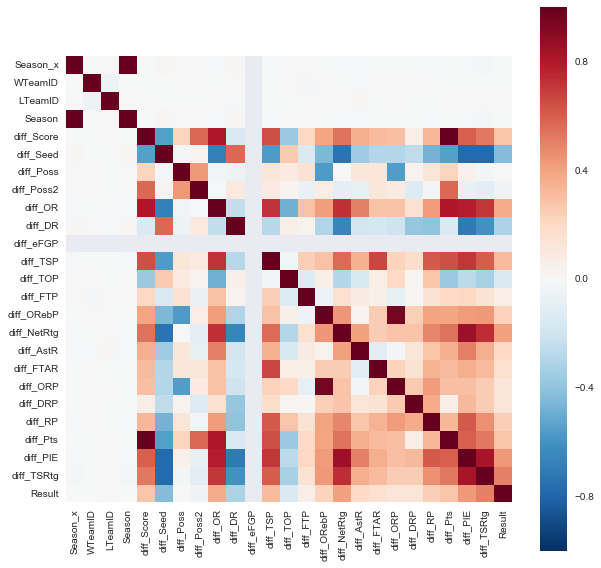

In [94]:
# Correlation heatmap

# Set size of plot so that it's readable
plt.figure(figsize=(10, 10))

# Produce heatmap
sns.heatmap(df_train.corr(), square=True)

In [95]:
#Create an array with all possible variables in it except the target. 
data_variables=df_train.columns.values.tolist()
y=['Result']
X=[i for i in data_variables if i not in y]

print(X)

['Season_x', 'WTeamID', 'LTeamID', 'WTeamIDSeas', 'LTeamIDSeas', 'WTeamIDSeas', 'LTeamIDSeas', 'Season', 'diff_Score', 'diff_Seed', 'diff_Poss', 'diff_Poss2', 'diff_OR', 'diff_DR', 'diff_eFGP', 'diff_TSP', 'diff_TOP', 'diff_FTP', 'diff_ORebP', 'diff_NetRtg', 'diff_AstR', 'diff_FTAR', 'diff_ORP', 'diff_DRP', 'diff_RP', 'diff_Pts', 'diff_PIE', 'diff_TSRtg']


In [96]:
# Add selected columns to a new array.
cols=['diff_TSP', 'diff_NetRtg', 'diff_TSRtg']
X=df_train[cols]
y=df_train['Result']

In [97]:
# Run model with Statsmodels API
import statsmodels.api as sm  
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.516617
         Iterations 7
                         Results: Logit
Model:              Logit            No. Iterations:   7.0000   
Dependent Variable: Result           Pseudo R-squared: 0.255    
Date:               2018-03-14 15:47 AIC:              7813.1203
No. Observations:   7556             BIC:              7833.9106
Df Model:           2                Log-Likelihood:   -3903.6  
Df Residuals:       7553             LL-Null:          -5237.3  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
diff_TSP       0.3017    0.9885   0.3052  0.7602  -1.6358  2.2391
diff_NetRtg   -0.0109    0.0073  -1.4905  0.1361  -0.0252  0.0034
diff_TSRtg     0.2856    0.0104  27.5602  0.0000   0.2652  0.3059



In [98]:
# Use SKLearn to prep data for some diagnostics and fit testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
# Accuracy is the proportion of true positives and true negatives vs false positives and false negatives.
# In your confusin matrix, it's top-left + bottom-right / total.
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [100]:
#10-Fold Cross-Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.719


In [101]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[819 313]
 [310 825]]


In [102]:
# Calculate Precision, Recall, F-Measure and Support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72      1132
          1       0.72      0.73      0.73      1135

avg / total       0.73      0.73      0.73      2267



In [103]:
# ROC Curve
# The ROC curve measures the tradeoff between selecting as many True Positives as possible while avoiding False Positives.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

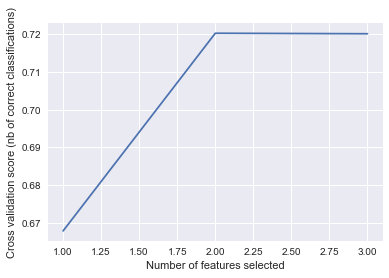

In [104]:
#Create a graph for the optimal number of features to use.

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Actual Predictions

In [105]:
# Get submission and teams csv.  Initialize in df.

df_predict = pd.read_csv(data_dir + 'SampleSubmissionStage2.csv')
df_teams = pd.read_csv(data_dir + 'Teams.csv')

In [106]:
# Parse the IDs from the submission file.

def get_year_t1_t2(id):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in id.split('_'))

for row in df_predict.itertuples():
    year, t1, t2 = get_year_t1_t2(row.ID)
    idx = row.Index
    df_predict.at[idx, 'Year'] = year
    df_predict.at[idx, 'Wteam'] = t1
    df_predict.at[idx, 'Lteam'] = t2

In [107]:
# Grab the data from before differentials were calculated to make the model, and use it to prep the new data.\
# Will need to get all the aggregated stats connected for the matchups in the tournament in order to predict the new games.
# This is basically prepping for what is called "out of sample" prediction.  
  # Meaning, now we're predicting stuff that wasn't in the original data sample we built the model on.  These are actual predictions.

predcats = [df_WinnerStats, df_LoserStats]
predcats = df_WinnerStats.append(df_LoserStats)
predcats.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11278 entries, 0 to 5638
Data columns (total 69 columns):
Season_x       11278 non-null int64
WTeamID        11278 non-null int64
LTeamID        11278 non-null int64
WTeamIDSeas    11278 non-null object
LTeamIDSeas    11278 non-null object
WTeamIDSeas    11278 non-null object
WScore         11278 non-null float64
WSeed          11278 non-null int64
WPoss          11278 non-null float64
WPoss2         11278 non-null float64
WOR            11278 non-null float64
WDR            11278 non-null float64
WeFGP          11278 non-null float64
WTSP           11278 non-null float64
WTOP           11278 non-null float64
WFTP           11278 non-null float64
WORebP         11278 non-null float64
WNetRtg        11278 non-null float64
WAstR          11278 non-null float64
WFTAR          11278 non-null float64
WORP           11278 non-null float64
WDRP           11278 non-null float64
WRP            11278 non-null float64
WPts           11278 non-null

In [108]:
# Take only columns we need for calculating the differentials our model uses as features.
predcats2 = predcats[['Season', 'WTeamID', 'LTeamID', 'WTSP','WNetRtg','WTSRtg', 
                       'LTSP','LNetRtg','LTSRtg']]

In [109]:
# Filter to only take 2018 data because only 2018 teams are int he tourney.
predcats3 = predcats2.loc[predcats2['Season'] == 2018]

In [110]:
# Merge win team aggregated 2018 data
df_predict = df_predict.merge(predcats3, how='left', left_on=['Year', 'Wteam'], 
                        right_on=['Season', 'WTeamID'])

In [111]:
# Merge lose team aggregated 2018 data
df_predict = df_predict.merge(predcats3, how='left', left_on=['Year', 'Lteam'], 
                        right_on=['Season', 'LTeamID'])

In [112]:
# Drop unneeded columns.
df_predict = df_predict[['ID', 'Year', 'Wteam', 'Lteam', 'WTSP_x', 'WNetRtg_x', 'WTSRtg_x', 
                         'LTSP_y', 'LNetRtg_y', 'LTSRtg_y']]

In [113]:
# Calculate differentials for each of the matchups.
df_predict['diff_TSP'] = df_predict['WTSP_x'] - df_predict['LTSP_y']
df_predict['diff_NetRtg'] = df_predict['WNetRtg_x'] - df_predict['LNetRtg_y']
df_predict['diff_TSRtg'] = df_predict['WTSRtg_x'] - df_predict['LTSRtg_y']


In [114]:
# The above appeared to give a cartesian product, so drop the extra duplicate columns that showed up.
df_predict2 = df_predict.drop_duplicates()

In [115]:
df_predict2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 198077
Data columns (total 13 columns):
ID             2278 non-null object
Year           2278 non-null object
Wteam          2278 non-null object
Lteam          2278 non-null object
WTSP_x         1757 non-null float64
WNetRtg_x      1757 non-null float64
WTSRtg_x       1757 non-null float64
LTSP_y         2161 non-null float64
LNetRtg_y      2161 non-null float64
LTSRtg_y       2161 non-null float64
diff_TSP       1669 non-null float64
diff_NetRtg    1669 non-null float64
diff_TSRtg     1669 non-null float64
dtypes: float64(9), object(4)
memory usage: 249.2+ KB


In [116]:
df_predict2.head()

ID  Year Wteam Lteam   WTSP_x  WNetRtg_x   WTSRtg_x  \
0    2018_1104_1112  2018  1104  1112  0.36069   9.889703  25.657413   
108  2018_1104_1113  2018  1104  1113  0.36069   9.889703  25.657413   
180  2018_1104_1116  2018  1104  1116  0.36069   9.889703  25.657413   
468  2018_1104_1120  2018  1104  1120  0.36069   9.889703  25.657413   
648  2018_1104_1137  2018  1104  1137  0.36069   9.889703  25.657413   

       LTSP_y  LNetRtg_y   LTSRtg_y  diff_TSP  diff_NetRtg  diff_TSRtg  
0    0.378786   9.504074  29.785967 -0.018096     0.385629   -4.128554  
108  0.390810  10.810599  32.540592 -0.030120    -0.920896   -6.883179  
180  0.366581   6.360568  26.045135 -0.005891     3.529135   -0.387722  
468  0.347423   8.878537  26.066104  0.013268     1.011166   -0.408691  
648  0.335698   4.010802  10.366732  0.024992     5.878901   15.290681

In [117]:
# Get the actual model intercept and coefficients
y_pred = logreg.predict(X_test)

# summarize the fit of the model
print(logreg.intercept_, logreg.coef_)
print(logrreg.score(y_test, y_pred))

# Ignore the error.  Not sure why it shows up, but it still gives us the intercept and coefficients.
# Intercept is the first one.  Other coefficients I believe are in the order they were put into the model.

[-0.002608] [[ 0.16296741 -0.01526614  0.28516537]]


NameError: name 'logrreg' is not defined

In [118]:
# Use intercept and coefficients to get yhat (the prediction variable).
# Note:  These are the log odds, which are very difficult to interpret.  We handle that next.
df_predict2['yhat'] = (-0.0026083 + (df_predict2['diff_TSP'] * 0.16296741 ) - 
                             (df_predict2['diff_NetRtg'] * 0.01526614  ) + 
                             (df_predict2['diff_TSRtg'] * 0.28516537))

C:\Users\bburns\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
# Exponentiating yhat gives you the log odds.  This is transformed into a probabilty next.
df_predict2['expyhat'] = np.exp(df_predict2['yhat'])

C:\Users\bburns\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [120]:
# Get your probability.  This is you're probability that "left team beats right team" -based on the way the submission file is set up.
# In general, it's your predictid probability that your result = 1.
# You can take this one step further and set it to a binary where anything greater than 0.5 = 1; less than 0.5 = 0.
df_predict2['prob'] = df_predict2['expyhat'] / (1 + df_predict2['expyhat'])

C:\Users\bburns\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
# Just for giggles:  Exponentiate coefficients to convert to odds.
# Not used for new predictions, but useful when trying to interpret the effects of the coefficients.
# Interpretation:  For each unit increase in diff_TSP, the odds of result = 1 increase 1.352131 times.
    # Which is to say, they more than double.
np.exp(result.params)

diff_TSP       1.352131
diff_NetRtg    0.989192
diff_TSRtg     1.330495
dtype: float64

In [123]:
df_predict2.head()

ID  Year Wteam Lteam   WTSP_x  WNetRtg_x   WTSRtg_x  \
0    2018_1104_1112  2018  1104  1112  0.36069   9.889703  25.657413   
108  2018_1104_1113  2018  1104  1113  0.36069   9.889703  25.657413   
180  2018_1104_1116  2018  1104  1116  0.36069   9.889703  25.657413   
468  2018_1104_1120  2018  1104  1120  0.36069   9.889703  25.657413   
648  2018_1104_1137  2018  1104  1137  0.36069   9.889703  25.657413   

       LTSP_y  LNetRtg_y   LTSRtg_y  diff_TSP  diff_NetRtg  diff_TSRtg  \
0    0.378786   9.504074  29.785967 -0.018096     0.385629   -4.128554   
108  0.390810  10.810599  32.540592 -0.030120    -0.920896   -6.883179   
180  0.366581   6.360568  26.045135 -0.005891     3.529135   -0.387722   
468  0.347423   8.878537  26.066104  0.013268     1.011166   -0.408691   
648  0.335698   4.010802  10.366732  0.024992     5.878901   15.290681   

         yhat    expyhat      prob  
0   -1.188765   0.304597  0.233480  
108 -1.956303   0.141380  0.123868  
180 -0.168009   0.845346  0.458096  
468 -0.132427   0.875967  0.466941  
648  4.272089  71.671204  0.986239

# Prep Final Submission

In [124]:
# Take only needed columns.
df_final = df_predict2[['Year', 'Wteam', 'Lteam', 'prob']]

In [125]:
# Merge in the team names.  Easier to fill out bracket that way.

# Merge in win teams.
df_final = df_final.merge(df_teams, how='left', left_on=['Wteam'], 
                        right_on=['TeamID'])



In [126]:
# Rename and drop columns for clarity.
df_final = df_final.rename(columns={'TeamName':'WTeamName'})

df_final=df_final.drop(['TeamID', 'FirstD1Season', 'LastD1Season'], axis=1)

In [127]:
# Merge in lose teams.
df_final = df_final.merge(df_teams, how='left', left_on=['Lteam'], 
                        right_on=['TeamID'])

In [128]:
# Rename and drop columns for clarity.
df_final = df_final.rename(columns={'TeamName':'LTeamName'})

df_final=df_final.drop(['TeamID', 'FirstD1Season', 'LastD1Season'], axis=1)

In [129]:
df_final.head()

Year Wteam Lteam      prob WTeamName   LTeamName
0  2018  1104  1112  0.233480   Alabama     Arizona
1  2018  1104  1113  0.123868   Alabama  Arizona St
2  2018  1104  1116  0.458096   Alabama    Arkansas
3  2018  1104  1120  0.466941   Alabama      Auburn
4  2018  1104  1137  0.986239   Alabama    Bucknell

In [130]:
# Save predictions to csv
df_final.to_csv('MMPredicts.csv')

In [ ]:
# Go fill out your bracket!

# DID NOT USE

In [ ]:
# #10-Fold Cross-Validation
# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score
# kfold = model_selection.KFold(n_splits=10, random_state=7)
# modelCV = LogisticRegression()
# scoring = 'accuracy'
# results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
# print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

In [ ]:
# # Calculate Precision, Recall, F-Measure and Support
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [ ]:
# # ROC Curve
# # The ROC curve measures the tradeoff between selecting as many True Positives as possible while avoiding False Positives.
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [ ]:
# Exponentiate coefficients to convert to odds.
# Not used for new predictions, but useful when trying to interpret the effects of the coefficients.
np.exp(result.params)